In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

1. Read and write a summary of the metadata .

In [61]:
df = pd.read_excel('Online Retail.xlsx', parse_dates=True, index_col='InvoiceDate')

In [62]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [63]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


2. Select only the transactions that have occurred from 01/04/ 2011 and 09/12/2011 and
create a dataset.

In [64]:
df_time = df[(df.index>='2011-04-01') & (df.index<='2011-12-09')]

In [65]:
df_time.isnull().sum()

InvoiceNo          0
StockCode          0
Description      985
Quantity           0
UnitPrice          0
CustomerID     88936
Country            0
dtype: int64

In [66]:
df_time = df_time[df_time['CustomerID'].notna()]

In [67]:
df_time = df_time[~df_time.InvoiceNo.str.contains('C',na=False)]

In [68]:
df_time[df_time.duplicated()].shape

(3932, 7)

In [69]:
df_time = df_time.drop_duplicates(keep='first')

In [70]:
print((df_time.Quantity<0).sum())

0


In [71]:
print((df_time.UnitPrice<0).sum())

0


3. Calculate the RFM values for each customer (by customer id). RFM represents:

a) R (Recency) − Recency should be calculated as the number of months before he
or she has made a purchase from the online store. If he/she made a purchase in
the month of December 2011, then the Recency should be 0. If purchase is made
in November 2011 then Recency should be 1 and so on and so forth.

In [72]:
df_time['R'] = 12 - df_time.index.month


In [73]:
df_time['R'] 

InvoiceDate
2011-04-01 08:22:00    8
2011-04-01 08:22:00    8
2011-04-01 08:22:00    8
2011-04-01 08:22:00    8
2011-04-01 08:22:00    8
                      ..
2011-12-08 20:01:00    0
2011-12-08 20:01:00    0
2011-12-08 20:01:00    0
2011-12-08 20:01:00    0
2011-12-08 20:01:00    0
Name: R, Length: 298878, dtype: int64

b)F (Frequency) − Number of invoices by the customer from 01/04/ 2011 and
09/12/2011.

In [74]:
df_time['F'] = 0

In [75]:
customer_ids = list(df_time['CustomerID'].unique())

In [76]:
for id in customer_ids:
  df_time.loc[df_time['CustomerID']==id, 'F'] += df_time.groupby(by='CustomerID').InvoiceNo.size()[id]

In [101]:
df_time['F']

InvoiceDate
2011-04-01 08:22:00      65
2011-04-01 08:22:00      65
2011-04-01 08:22:00      65
2011-04-01 08:22:00      65
2011-04-01 08:22:00      65
                       ... 
2011-12-08 20:01:00    3430
2011-12-08 20:01:00    3430
2011-12-08 20:01:00    3430
2011-12-08 20:01:00    3430
2011-12-08 20:01:00    3430
Name: F, Length: 298878, dtype: int64

c)M (Monetary Value) − Total spend by the customer from 01/04/ 2011 and
09/12/2011.

In [77]:
df_time['Revenue'] = df_time.Quantity * df_time.UnitPrice

In [78]:
df_time['M'] = 0

In [79]:
for id in customer_ids:
  df_time.loc[df_time['CustomerID']==id, 'M'] += df_time.groupby(by='CustomerID').Revenue.sum()[id]

In [102]:
df_time['M']

InvoiceDate
2011-04-01 08:22:00     1317.16
2011-04-01 08:22:00     1317.16
2011-04-01 08:22:00     1317.16
2011-04-01 08:22:00     1317.16
2011-04-01 08:22:00     1317.16
                         ...   
2011-12-08 20:01:00    26810.00
2011-12-08 20:01:00    26810.00
2011-12-08 20:01:00    26810.00
2011-12-08 20:01:00    26810.00
2011-12-08 20:01:00    26810.00
Name: M, Length: 298878, dtype: float64

In [80]:
df_rfm = pd.DataFrame(customer_ids, columns=['Customer ID'])

In [81]:
df_rfm['R'] = 0
df_rfm['F'] = 0
df_rfm['M'] = 0

In [82]:
for id in customer_ids:
    df_rfm.loc[df_rfm['Customer ID']==id, 'R'] += df_time.loc[df_time['CustomerID']==id, 'R'].values[0]
    df_rfm.loc[df_rfm['Customer ID']==id, 'F'] += df_time.loc[df_time['CustomerID']==id, 'F'].values[0]
    df_rfm.loc[df_rfm['Customer ID']==id, 'M'] += df_time.loc[df_time['CustomerID']==id, 'M'].values[0]

In [103]:
df_rfm 

,Customer ID,R,F,M,labels
0,18161.0,8,65,1317.16,0
1,14886.0,8,18,364.80,0
2,17613.0,8,217,3153.93,0
3,12523.0,8,83,1428.33,0
4,13694.0,8,368,46180.24,2
...,...,...,...,...,...
3844,17830.0,0,7,111.05,0
3845,13298.0,0,2,360.00,0
3846,16833.0,0,15,435.24,0
3847,14569.0,0,12,227.39,0


5. Create the customer segments with K-means algorithm by using number of clusters is
suggested by elbow method.

In [83]:
from sklearn.cluster import KMeans

In [84]:
wcss = []

In [85]:
for k in range(0, 10):
  kmeans = KMeans(n_clusters=k+1, random_state=0).fit(df_rfm[['R', 'F', 'M']])
  wcss.append(kmeans.inertia_)


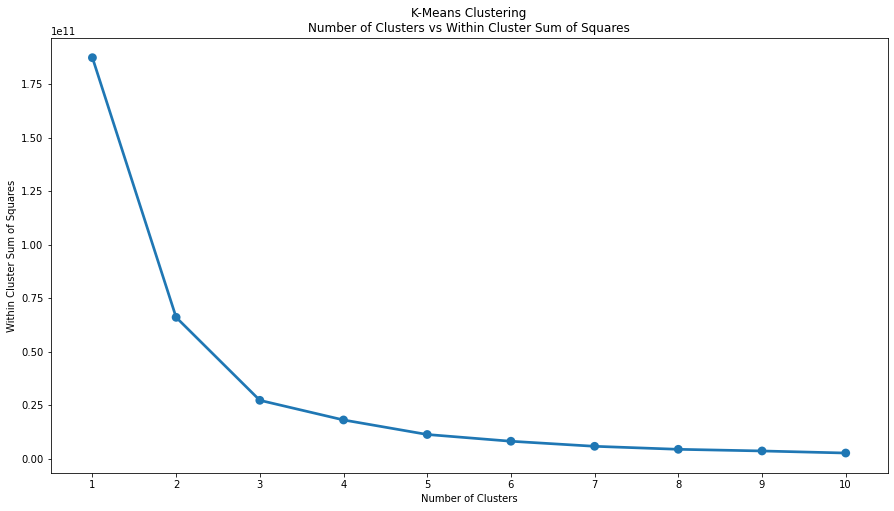

In [86]:
plt.figure(figsize=(15,8))
ax = sns.pointplot(x=list(range(1, 11)), y=wcss)
ax.set_title('K-Means Clustering\nNumber of Clusters vs Within Cluster Sum of Squares')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Cluster Sum of Squares')
plt.show()

6. Plot the clusters in a scatter plot and mark each segment differently using lmplot.

In [87]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_rfm[['R', 'F', 'M']])


In [88]:
df_rfm['labels'] = kmeans.labels_

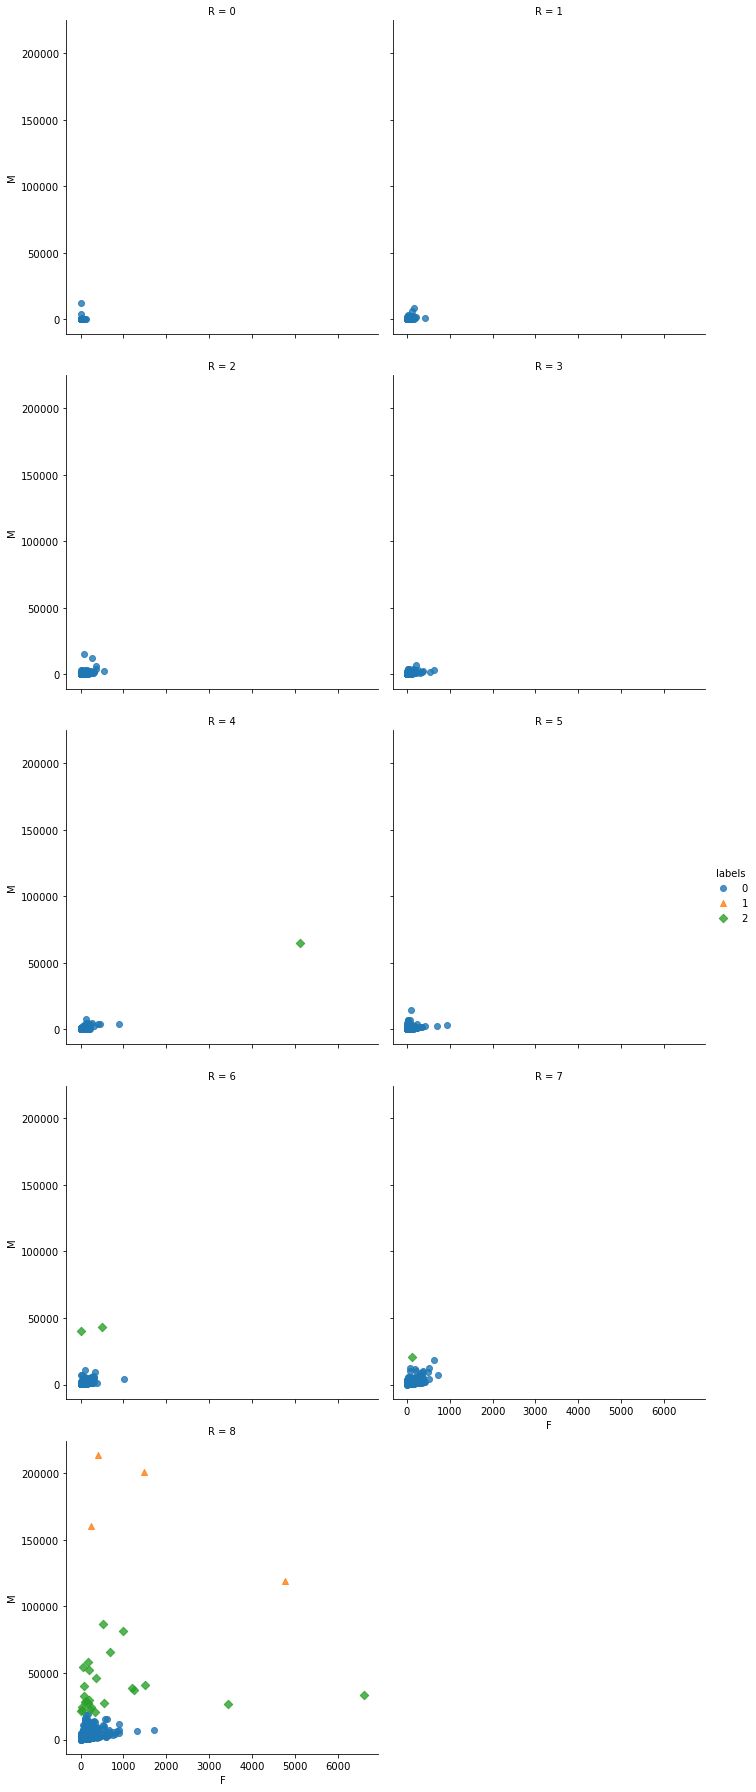

In [89]:
sns.lmplot(x='F', y='M', col='R', hue='labels', data=df_rfm, col_wrap=2, fit_reg=False, markers=['o', '^', 'D'])


7. Print the cluster centers of each customer segment and explain them intuitively.

In [90]:
kmeans.cluster_centers_

array([[5.00209644e+00, 6.99821803e+01, 1.22842223e+03],
       [8.00000000e+00, 1.72525000e+03, 1.73486923e+05],
       [7.68965517e+00, 8.59482759e+02, 3.93992303e+04]])

The cluster centre of cluster:

0 has a value of 4.38 for R, 68.6 for F, and 1212 for M (customers with Low Recency, Low Frequency and Low Monetary Value) - customers who are of little value.

1 has a value of 4.00 for R, 1296 for F, and 168158 for M (customers with Low Recency, High Frquency and High Monetary Value) - loyal customers who should be entered in the Loyalty Program and given special benefits.

2 has a value of 5.25 for R, 865 for F, and 39738 for M (customers with Low Recency, Medium Frequency, and Medium Monetary Value) - occasional shoppers - should be sent more promos and offers

8. Create the customer segments with Agglomerative algorithm by using number of
clusters is suggested by elbow method.
from sklearn.cluster import AgglomerativeClustering

In [91]:
from sklearn.cluster import AgglomerativeClustering

In [92]:
agglo = AgglomerativeClustering(n_clusters=3, compute_distances=True).fit(df_rfm[['R','F','M']])

9. Visualize the clusters using the dendrogram.

In [93]:
from scipy.cluster.hierarchy import dendrogram

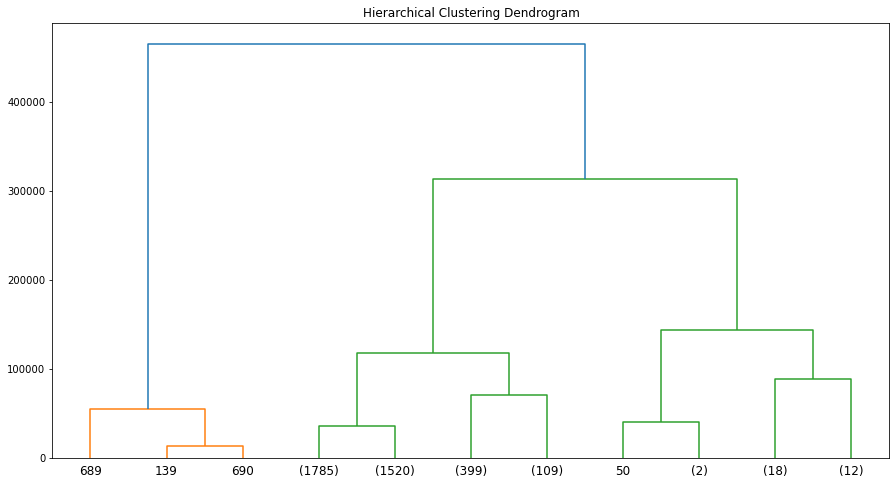

In [94]:
def plot_dendrogram(agglo, **kwargs):
    
    counts = np.zeros(agglo.children_.shape[0])
    n_samples = len(agglo.labels_)
    for i, merge in enumerate(agglo.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([agglo.children_, agglo.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)
    

plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, truncate_mode='level', p=3)
plt.show()

10. Compare the clusters obtained using KMeans vs. Agglomeration

In [95]:
labels_kmeans = list(kmeans.labels_)

In [99]:
labels_agglo = list(agglo.labels_)

In [97]:
print('Cluster 0 - KMeans: ', labels_kmeans.count(0))
print('Cluster 1 - KMeans: ', labels_kmeans.count(1))
print('Cluster 2 - KMeans: ', labels_kmeans.count(2))

print()

Cluster 0 - KMeans:  3816
Cluster 1 - KMeans:  4
Cluster 2 - KMeans:  29



In [100]:
print('Cluster 0 - Agglomerative: ', labels_agglo.count(0))
print('Cluster 1 - Agglomerative: ', labels_agglo.count(1))
print('Cluster 2 - Agglomerative: ', labels_agglo.count(2))

Cluster 0 - Agglomerative:  33
Cluster 1 - Agglomerative:  3
Cluster 2 - Agglomerative:  3813
